In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DataSets/ecommerce_customers_unit1.csv")
df

,customer_id,age,gender,country,signup_date,last_purchase_date,num_orders,total_spent,avg_order_value,recency_days,is_premium_member,device_type,preferred_category,churned
0,10001,56.0,Male,India,2022-01-27,2024-04-27,10,13273.25,1327.32,522,0,NaN,Home,0
1,10002,69.0,Other,UK,2025-01-12,2025-08-01,10,NaN,308.90,61,0,Mobile,Grocery,0
2,10003,46.0,Female,USA,2021-04-25,2021-06-01,5,3411.83,682.37,1583,0,NaN,NaN,0
3,10004,32.0,Male,India,2021-02-23,2023-09-22,5,4502.00,900.40,740,0,NaN,NaN,0
4,10005,60.0,Female,India,2021-06-07,2021-12-11,7,3842.10,548.87,1390,0,Tablet,Books,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,10358,25.0,Female,India,2023-09-04,2025-06-18,7,NaN,0.00,105,1,Mobile,Electronics,0
601,10117,50.0,Male,USA,2024-05-11,2024-11-08,4,3640.07,910.02,327,0,Mobile,Electronics,0
602,10599,46.0,Male,India,2020-12-01,2024-06-25,6,2176.22,362.70,463,1,Desktop,Electronics,0
603,10442,32.0,Female,UK,2023-12-20,2024-09-20,3,5478.65,1826.22,376,0,Mobile,Home,0


In [7]:
target = df.isna().sum().sort_values(ascending=False)
target

gender                34
total_spent           34
country               32
device_type           30
age                   28
preferred_category    22
last_purchase_date     0
signup_date            0
customer_id            0
num_orders             0
recency_days           0
avg_order_value        0
is_premium_member      0
churned                0
dtype: int64

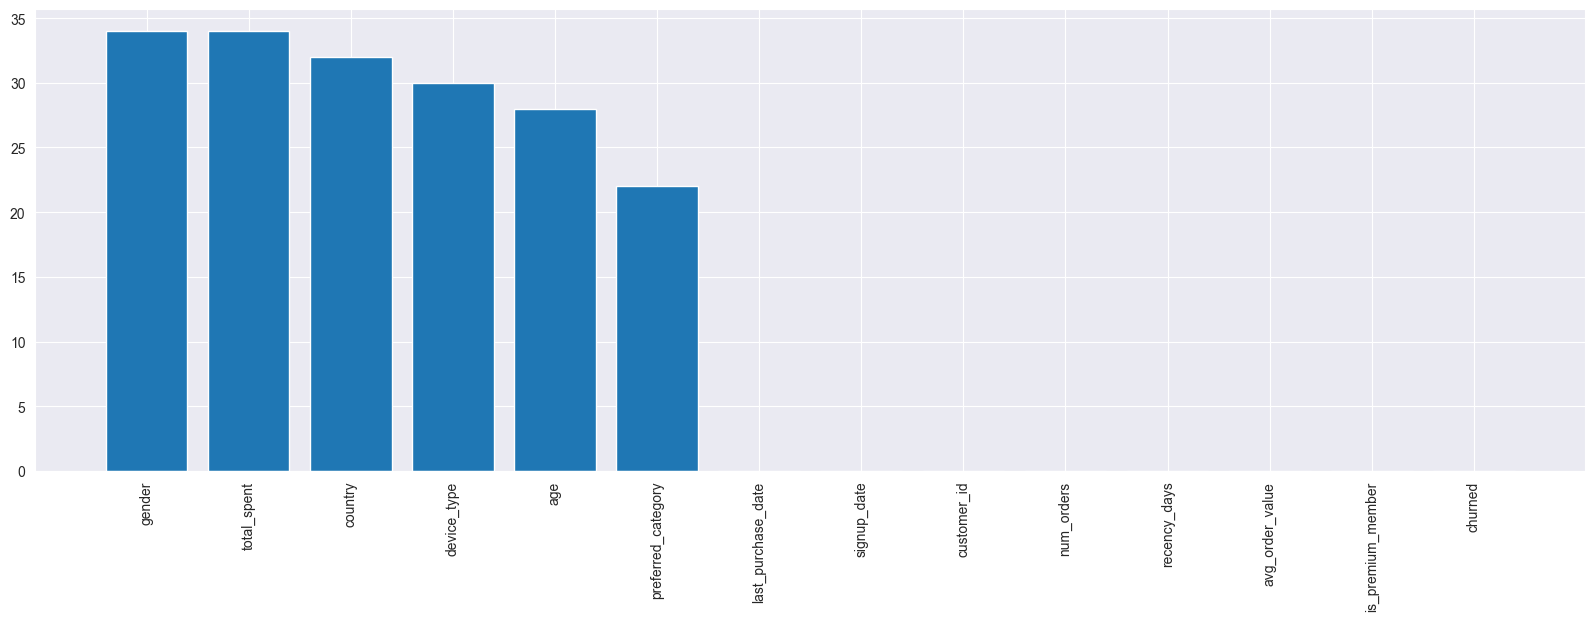

In [10]:
#barplot using plt

plt.figure(figsize=(20, 6))
plt.bar(target.index, target)
plt.xticks(rotation=90)
plt.show()

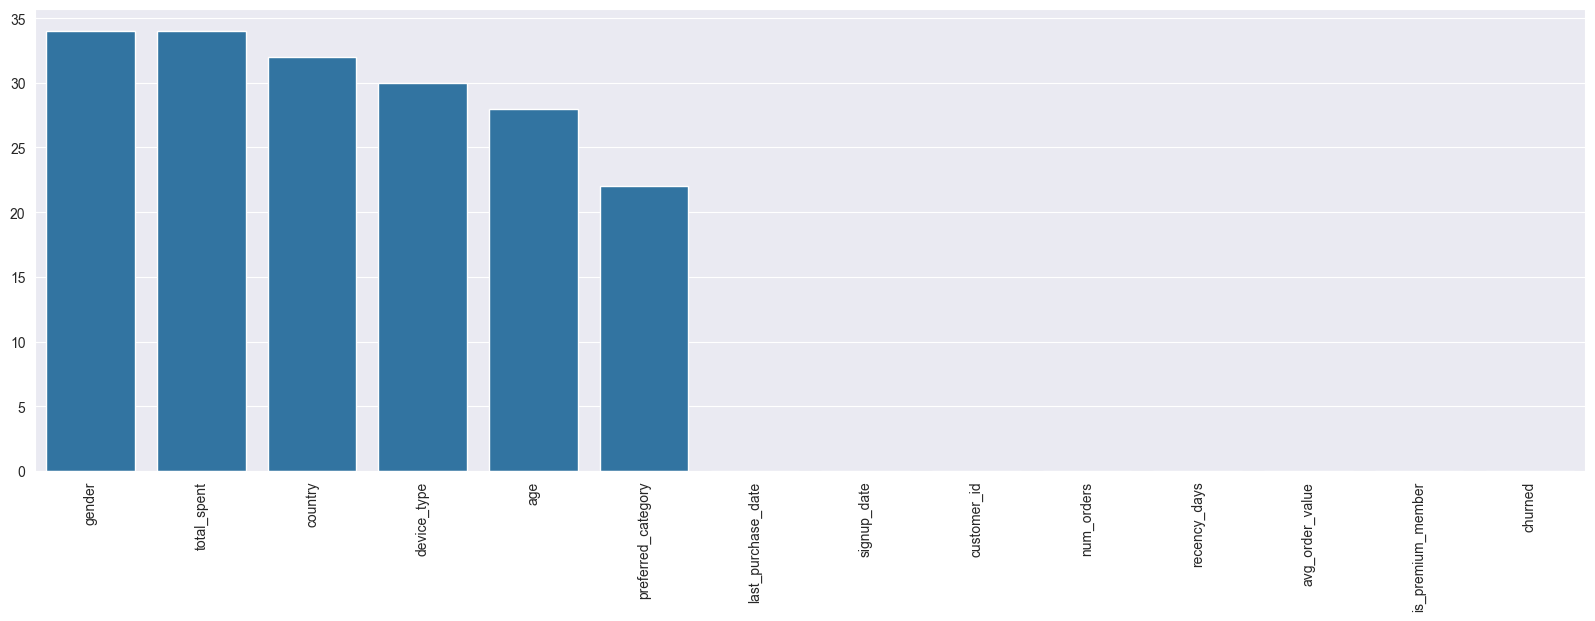

In [12]:
#barplot using sns

plt.figure(figsize=(20, 6))
sns.barplot(target)
plt.xticks(rotation=90)
plt.show()

In [13]:
df = df.select_dtypes(include=[np.number])

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3 - q1

out = df[(df < q1 - 1.5 * iqr) | (df > q3 + 1.5 * iqr)]
out.count()

customer_id           0
age                   0
num_orders            5
total_spent          21
avg_order_value      15
recency_days         10
is_premium_member     0
churned              22
dtype: int64